## Main micro-grad with proper functions

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Value:

    def __init__(self, data, _children=(), _op = '', label = ''):
        self.data = data
        self._prev = set(_children)             #Tuple children saved as empty set
        self._op = _op
        self.label = label
        self.grad = 0           #Place to store gradient value
        self._backward = lambda: None
    
    #To output the proper values from function
    def __repr__(self):
        return(f"Value(data={self.data})")

    # Underscores ensures the actual return function is used as addition / multiplication etc
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad = 1.0 * out.grad
            other.grad = 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            self.grad = other.data * out.grad
            other.grad = self.data * out.grad
        out._backward = _backward
        return out
    
    #Special tanh function to be used with the neural networks
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        def _backward():
            self.grad = (1 - t**2) * out.grad
        out._backward = _backward
        return out

## Graph Visualization routine

In [5]:
from graphviz import Digraph
def trace(root):
    #Build set of nodes and edges of graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) #LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))

        #for any value in graph create a rectangular record for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data, n.grad ), shape = 'record')
        if n._op:
            #Op nodes
            dot.node(name = uid + n._op, label=n._op)
            dot.edge(uid + n._op, uid)
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    return dot

## Usage in simple neural network

![image](./nn_02.png)

In [6]:
# Inputs x1, x2
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(6.8813735870195432, label='b')
x1w1 = x1 * w1; x1w1.label = 'x1 * w1'
x2w2 = x2 * w2; x2w2.label = 'x2 * w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1w1 + x2w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

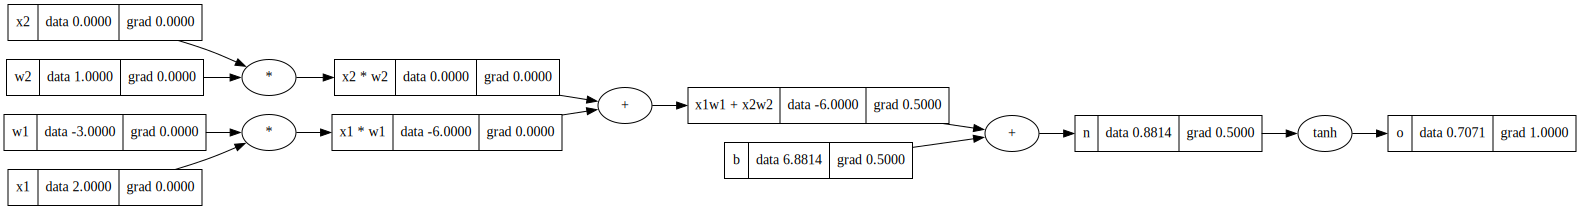

In [14]:
draw_dot(o)

In [8]:
#Base case on initialize the gradient
o.grad = 1.0

In [10]:
o._backward()

In [13]:
n._backward()